In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [32]:
train=pd.read_csv(r"C:\Users\91882\Downloads\Train_Set_TVS.csv")
test=pd.read_csv(r"C:\Users\91882\Downloads\Test_Set_TVS.csv")

In [33]:
pd.set_option('display.max_columns',None)
train

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,435665,641706.0,Y,1048272.0,13181.84,0.0238,IT,ndf,One,4.0,Rural,3,Grad,Married,F,1_to_3,NaN,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,43.0,7.0,Yes,Yes,0.886,0.886,2766.0,5.0,1.0
132436,509840,594160.0,N,640232.0,11911.93,0.0262,IT,ndf,One,4.0,Metro,3,Grad,Single,M,1_to_3,NaN,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,60.0,9.0,Yes,Yes,NaN,0.641,2581.0,1.0,0.0
132437,504105,1471170.0,N,732914.0,11587.54,NaN,Non-IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.5,NaN,SAT,Yes,CLoan,2.0,2.0,South,51.0,4.0,Yes,Yes,0.384,0.384,1987.0,3.0,0.0
132438,430757,613585.0,N,528490.2,13008.76,0.0056,Non-IT,ndf,One,4.0,Metro,1,Grad,Widow,M,1_to_3,NaN,Y,mon,Yes,CLoan,1.0,2.0,Central,59.0,14.0,Yes,Yes,0.224,0.224,1608.0,2.0,1.0


In [34]:
train.shape

(132440, 33)

In [35]:
test.shape

(56760, 32)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [37]:
test

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,671640.0,N,260085.00,9654.50,0.0050,IT,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,3.6,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0
56756,450327,650680.0,N,714467.60,14063.75,0.0321,NaN,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,15.1,Y,Tue,Yes,CLoan,2.0,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0
56757,476417,551374.0,NaN,231420.00,11299.78,0.0334,Govt.,df,None,2.0,Metro,1,Grad,Divorce,M,1_to_3,0.3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0
56758,461152,975117.0,N,1096620.00,10223.30,0.0052,IT,ndf,One,4.0,Metro,2,Other,Single,M,>6,1.4,Y,mon,Yes,CLoan,1.0,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0


In [38]:
train.Prop_List.value_counts() 

One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64

In [39]:
train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [40]:
# Checking percentage of null value present in the data for each predictor
pd.DataFrame(train.isnull().sum()*100/train.isnull().count())

,0
ID,0.000000
Compensation,4.713078
Vehicle_Status,6.874056
Loan_amt,0.000000
Annuity_amt,3.481577
density_Ind,4.089399
Job_Type,7.737844
Default_hist,0.000000
Prop_List,1.483691
Home_Appliances,8.278466


In [41]:
pd.DataFrame(test.isnull().sum()*100/test.isnull().count())

,0
ID,0.000000
Compensation,4.844961
Vehicle_Status,6.841085
Loan_amt,0.000000
Annuity_amt,3.458421
density_Ind,4.008104
Job_Type,7.610994
Default_hist,0.000000
Prop_List,1.605004
Home_Appliances,8.384426


In [42]:
# Here we are converting data types of few variabe that is shown as int but should be object
train['Dependents']=train.Dependents.astype('object')
train['Company_Rating']=train['Company_Rating'].astype('object')

In [43]:
cat=train.select_dtypes('object')
cat

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,NaN,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes


In [44]:
cat.describe()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag
count,123336,122192,132440,130475,132440,129750,132440,132440,132440,132440,124758,132440,132440,132440,132440.0,120709.0,132440,132440,132440
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,9.0,3.0,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,2.0,2.0,North,Yes,Yes
freq,81370,66982,119170,91559,107548,67072,93858,97609,87063,117604,89848,23146,105944,119928,68172.0,89965.0,53101,122098,108616


In [45]:
cat.Education_det.value_counts().index[0]

'Grad'

In [46]:
num=train.select_dtypes(np.number)
num

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,32.0,16.0,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,435665,641706.0,1048272.0,13181.84,0.0238,4.0,NaN,43.0,7.0,0.886,0.886,2766.0,5.0,1.0
132436,509840,594160.0,640232.0,11911.93,0.0262,4.0,NaN,60.0,9.0,NaN,0.641,2581.0,1.0,0.0
132437,504105,1471170.0,732914.0,11587.54,NaN,4.0,2.5,51.0,4.0,0.384,0.384,1987.0,3.0,0.0
132438,430757,613585.0,528490.2,13008.76,0.0056,4.0,NaN,59.0,14.0,0.224,0.224,1608.0,2.0,1.0


In [47]:
num.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


<AxesSubplot:>

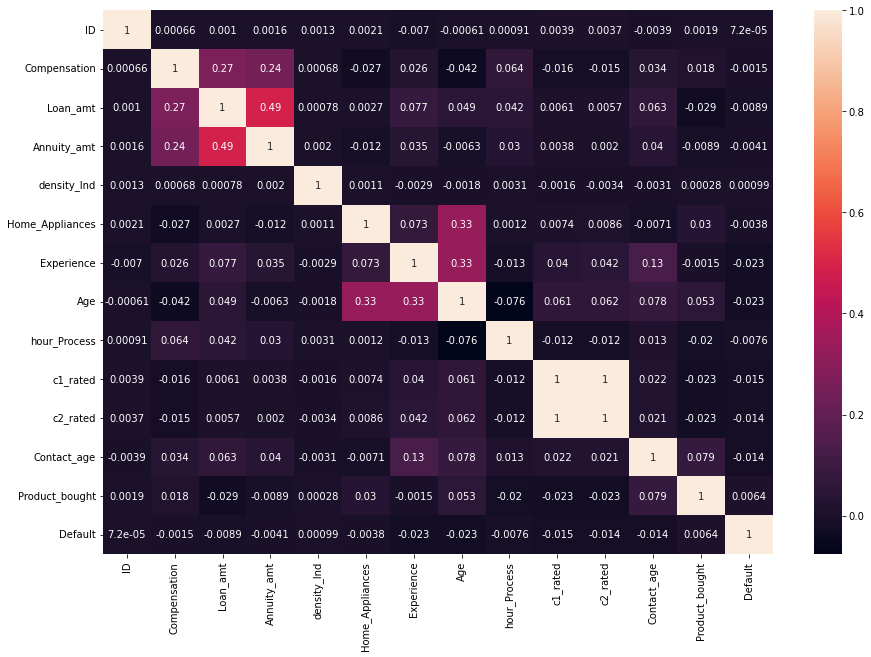

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True)

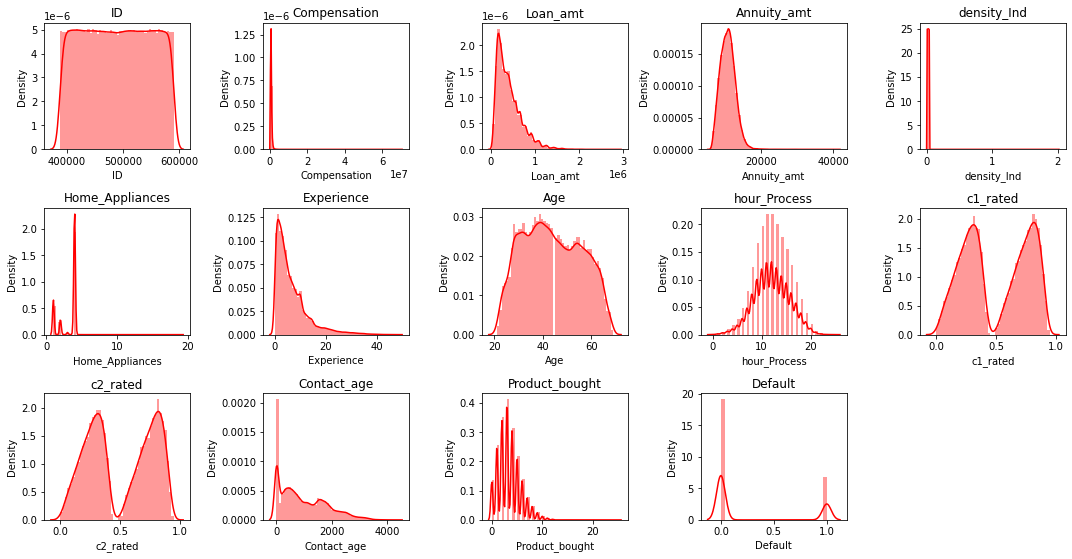

In [49]:
a=4
b=5
c=1
plt.figure(figsize=(15,10))
for i in num.columns:
    plt.subplot(a,b,c)
    sns.distplot(num.loc[:,i],color
                 ='r')
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()
#to check  the distribution whether it is skewed or not on the basis of skewness we apply imputation

In [50]:
cat.isnull().sum()

Vehicle_Status         9104
Job_Type              10248
Default_hist              0
Prop_List              1965
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Addr_permanent            0
Permanent_Addr_tag        0
dtype: int64

In [51]:
#we are imputing nan valueswith median for numerical features & most aoccuring data for categorical feature
catdata=cat.apply(lambda x:x.fillna(x.value_counts().index[0]))  
catdata


,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes


In [52]:
ntrain=pd.concat([catdata,num],axis=1)
ntrain

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,32.0,16.0,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes,435665,641706.0,1048272.0,13181.84,0.0238,4.0,NaN,43.0,7.0,0.886,0.886,2766.0,5.0,1.0
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes,509840,594160.0,640232.0,11911.93,0.0262,4.0,NaN,60.0,9.0,NaN,0.641,2581.0,1.0,0.0
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes,504105,1471170.0,732914.0,11587.54,NaN,4.0,2.5,51.0,4.0,0.384,0.384,1987.0,3.0,0.0
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes,430757,613585.0,528490.2,13008.76,0.0056,4.0,NaN,59.0,14.0,0.224,0.224,1608.0,2.0,1.0


In [53]:
ntrain

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,32.0,16.0,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes,435665,641706.0,1048272.0,13181.84,0.0238,4.0,NaN,43.0,7.0,0.886,0.886,2766.0,5.0,1.0
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes,509840,594160.0,640232.0,11911.93,0.0262,4.0,NaN,60.0,9.0,NaN,0.641,2581.0,1.0,0.0
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes,504105,1471170.0,732914.0,11587.54,NaN,4.0,2.5,51.0,4.0,0.384,0.384,1987.0,3.0,0.0
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes,430757,613585.0,528490.2,13008.76,0.0056,4.0,NaN,59.0,14.0,0.224,0.224,1608.0,2.0,1.0


In [54]:
ntrain['Experience']=ntrain.groupby('Age')['Experience'].fillna(ntrain.Experience.mean())

In [55]:
# NUllvalue imputation on the basis of educatio
ntrain['Compensation']=ntrain.groupby('Education_det')['Compensation'].fillna(ntrain.Compensation.median())

In [56]:
ntrain['density_Ind']=ntrain['density_Ind'].fillna(ntrain.density_Ind.mean())

In [57]:
ntrain['Annuity_amt']=ntrain['Annuity_amt'].fillna(ntrain.Annuity_amt.mean())
ntrain['c1_rated']=ntrain['c1_rated'].fillna(ntrain.c1_rated.median())
ntrain['c2_rated']=ntrain['c2_rated'].fillna(ntrain.c2_rated.median())
ntrain['Contact_age']=ntrain['Contact_age'].fillna(ntrain.Contact_age.median())

In [58]:
# On the basis of company rating finding the laon amount assign to customer
ntrain.groupby('Company_Rating')['Loan_amt'].sum()

Company_Rating
1.0    6.950580e+09
2.0    4.120723e+10
3.0    6.778451e+09
Name: Loan_amt, dtype: float64

In [59]:
ntrain.Company_Rating.value_counts()
# As we can see company rating of 2 has heighest customers but still they got less loan amount means 

2.0    101696
3.0     17216
1.0     13528
Name: Company_Rating, dtype: int64

In [60]:
ntrain.isnull().sum()

Vehicle_Status            0
Job_Type                  0
Default_hist              0
Prop_List                 0
Region_Type               0
Credit_Inq                0
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Income_Alt                0
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Addr_permanent            0
Permanent_Addr_tag        0
ID                        0
Compensation              0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Home_Appliances       10964
Experience                0
Age                       0
hour_Process              0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default                   0
dtype: int64

#filling nan values in numericalfeatureson the basis of their edcation
train['Compensation']=train.groupby('Education_det')['Compensation'].fillna(np.median)

In [61]:
# As their is ample no. of nan value in train & test data ,both have approx same percentage of nan values so we fill the nan 
# values by their median  & mode in numerical features & categorical Features

In [62]:
test

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,671640.0,N,260085.00,9654.50,0.0050,IT,ndf,One,4.0,Metro,1,Grad,Single,F,1_to_3,3.6,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0
56756,450327,650680.0,N,714467.60,14063.75,0.0321,NaN,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,15.1,Y,Tue,Yes,CLoan,2.0,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0
56757,476417,551374.0,NaN,231420.00,11299.78,0.0334,Govt.,df,None,2.0,Metro,1,Grad,Divorce,M,1_to_3,0.3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0
56758,461152,975117.0,N,1096620.00,10223.30,0.0052,IT,ndf,One,4.0,Metro,2,Other,Single,M,>6,1.4,Y,mon,Yes,CLoan,1.0,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0


In [63]:
# Doing the same on test data
test['Dependents']=test.Dependents.astype('object')
test['Company_Rating']=test['Company_Rating'].astype('object')
catts=test.select_dtypes('object').apply(lambda x:x.fillna(x.value_counts().index[0]))  
numtst=test.select_dtypes(np.number)
ntest=pd.concat([catts,numtst],axis=1)
ntest

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,Y,Govt.,ndf,Morethan_One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,Yes,Yes,487410,653106.0,809400.00,9145.51,0.0015,1.0,5.4,39.0,11.0,0.349,0.349,3133.0,2.0
1,N,Govt.,ndf,One,Metro,1,Grad,Married,M,1_to_3,Y,wed,No,CLoan,2.0,3.0,Central,Yes,Yes,533258,434150.0,72618.75,7683.23,0.0332,4.0,2.3,46.0,13.0,0.237,0.237,1730.0,5.0
2,N,IT,ndf,Morethan_One,Rural,1,Grad,Married,M,1_to_3,Y,thur,No,CLoan,3.0,2.0,South,Yes,Yes,581926,489060.0,267255.80,9032.85,0.0316,NaN,11.0,33.0,15.0,0.111,0.111,759.0,4.0
3,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Y,Tue,Yes,CLoan,2.0,2.0,East,Yes,Yes,486301,957294.0,623600.00,12838.25,0.0320,4.0,9.7,48.0,12.0,0.323,0.323,609.0,4.0
4,N,Non-IT,ndf,One,Metro,3,P_Grad,Married,F,1_to_3,Y,wed,Yes,RLoan,2.0,3.0,North,Yes,Yes,580822,1333739.0,529520.00,11799.09,0.0073,4.0,NaN,53.0,7.0,0.940,0.940,1222.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,N,IT,ndf,One,Metro,1,Grad,Single,F,1_to_3,Not_Specified,wed,Yes,CLoan,1.0,2.0,North,Yes,Yes,513665,671640.0,260085.00,9654.50,0.0050,4.0,3.6,42.0,11.0,0.716,0.716,215.0,7.0
56756,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Y,Tue,Yes,CLoan,2.0,3.0,East,Yes,Yes,450327,650680.0,714467.60,14063.75,0.0321,NaN,15.1,47.0,9.0,NaN,0.193,22.0,0.0
56757,N,Govt.,df,None,Metro,1,Grad,Divorce,M,1_to_3,Not_Specified,thur,Yes,RLoan,3.0,2.0,East,No,Yes,476417,551374.0,231420.00,11299.78,0.0334,2.0,0.3,35.0,10.0,0.175,0.175,776.0,5.0
56758,N,IT,ndf,One,Metro,2,Other,Single,M,>6,Y,mon,Yes,CLoan,1.0,1.0,North,Yes,No,461152,975117.0,1096620.00,10223.30,0.0052,4.0,1.4,22.0,13.0,0.669,0.669,873.0,3.0


In [64]:
# Nullvalue imputatuion on test data
ntest['Annuity_amt']=ntest['Annuity_amt'].fillna(ntest.Annuity_amt.mean())
ntest['c1_rated']=ntest['c1_rated'].fillna(ntest.c1_rated.median())
ntest['c2_rated']=ntest['c2_rated'].fillna(ntest.c2_rated.median())
ntest['Contact_age']=ntest['Contact_age'].fillna(ntest.Contact_age.median())
ntest['Experience']=ntest.groupby('Age')['Experience'].fillna(ntest.Experience.mean())
ntest['Compensation']=ntest.groupby('Education_det')['Compensation'].fillna(ntest.Compensation.median())
ntest['density_Ind']=ntest['density_Ind'].fillna(ntest.density_Ind.mean())

In [65]:
ntest.isnull().sum()

Vehicle_Status           0
Job_Type                 0
Default_hist             0
Prop_List                0
Region_Type              0
Credit_Inq               0
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Income_Alt               0
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating           0
Region                   0
Addr_permanent           0
Permanent_Addr_tag       0
ID                       0
Compensation             0
Loan_amt                 0
Annuity_amt              0
density_Ind              0
Home_Appliances       4759
Experience               0
Age                      0
hour_Process             0
c1_rated                 0
c2_rated                 0
Contact_age              0
Product_bought           0
dtype: int64

In [66]:
# here i am removing ID,Home_applainces from train & test data because i dont find it significant feature to this model
ntrain.drop(['Home_Appliances','ID'],axis=1,inplace=True)
ntest.drop(['Home_Appliances','ID'],axis=1,inplace=True)


In [67]:
ntest.Job_Type.value_counts()

IT        33112
Non-IT    12640
Govt.     11008
Name: Job_Type, dtype: int64

In [68]:
ntrain.isnull().sum()

Vehicle_Status        0
Job_Type              0
Default_hist          0
Prop_List             0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Addr_permanent        0
Permanent_Addr_tag    0
Compensation          0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Experience            0
Age                   0
hour_Process          0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [69]:
ntest.isnull().sum()

Vehicle_Status        0
Job_Type              0
Default_hist          0
Prop_List             0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Addr_permanent        0
Permanent_Addr_tag    0
Compensation          0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Experience            0
Age                   0
hour_Process          0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [70]:
ntrain


,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No,801850.0,658040.0,13816.52,0.030400,0.900000,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes,884222.0,198075.0,11173.06,0.019400,3.000000,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes,284120.0,101056.0,8390.40,0.011800,6.580616,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes,341874.0,179008.0,7184.13,0.037300,4.700000,39.0,12.0,0.500,0.561,20.0,4.0,0.0
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes,1259895.0,573715.0,13212.77,0.013800,6.900000,32.0,16.0,0.500,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes,641706.0,1048272.0,13181.84,0.023800,6.580616,43.0,7.0,0.886,0.886,2766.0,5.0,1.0
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes,594160.0,640232.0,11911.93,0.026200,6.580616,60.0,9.0,0.500,0.641,2581.0,1.0,0.0
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes,1471170.0,732914.0,11587.54,0.020446,2.500000,51.0,4.0,0.384,0.384,1987.0,3.0,0.0
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes,613585.0,528490.2,13008.76,0.005600,6.580616,59.0,14.0,0.224,0.224,1608.0,2.0,1.0


<AxesSubplot:xlabel='Education_det', ylabel='count'>

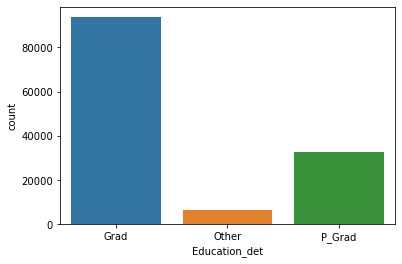

In [71]:
sns.countplot(ntrain.Education_det )
# here we can see most of the applicants are Grauduates

<AxesSubplot:xlabel='Education_det', ylabel='count'>

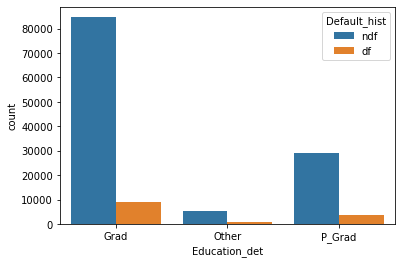

In [86]:
sns.countplot(ntrain.Education_det,hue=ntrain.Default_hist)

<AxesSubplot:xlabel='Education_det', ylabel='count'>

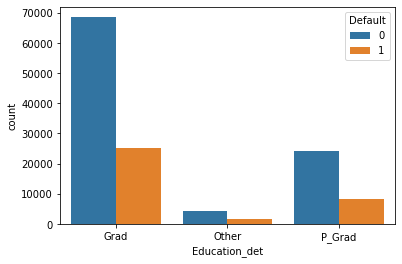

In [87]:
sns.countplot(ntrain.Education_det,hue=ntrain.Default)

<AxesSubplot:xlabel='Job_Type', ylabel='count'>

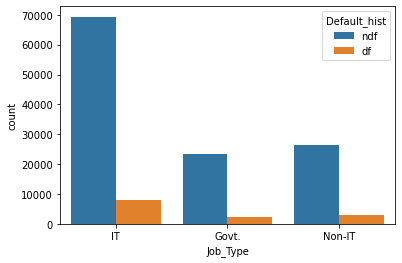

In [72]:
sns.countplot(ntrain.Job_Type,hue=ntrain.Default_hist)

<AxesSubplot:xlabel='Job_Type', ylabel='count'>

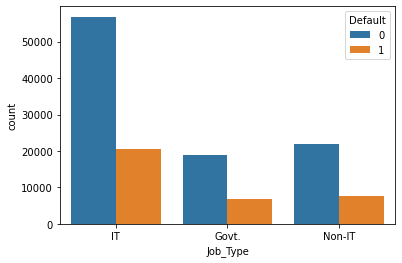

In [88]:
sns.countplot(ntrain.Job_Type,hue=ntrain.Default)

In [ ]:
ntrain.groupby(['Education_det','Job_Type'])['Default'].value_counts()

<AxesSubplot:xlabel='Job_Type', ylabel='count'>

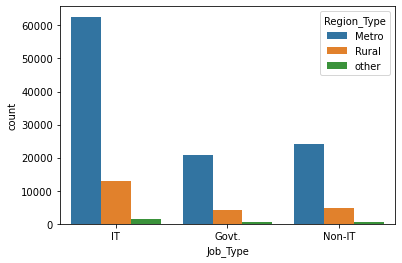

In [73]:
# diiferent job peoplefrom different region on the basis of region
sns.countplot(ntrain.Job_Type,hue=ntrain.Region_Type)

<AxesSubplot:xlabel='Region', ylabel='count'>

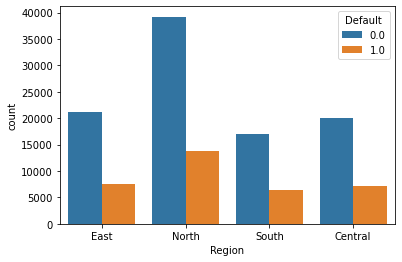

In [74]:
# Defaulters on the basis of region
sns.countplot(ntrain['Region'],hue=ntrain.Default)
# most of population from north region so most of the defaulters are north

<AxesSubplot:xlabel='Gen', ylabel='count'>

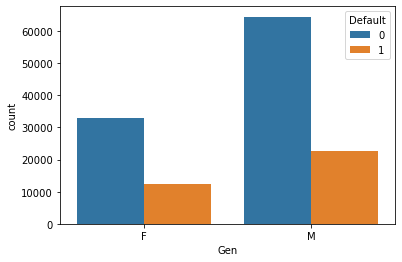

In [78]:
sns.countplot(ntrain['Gen'],hue=ntrain['Default'])

In [81]:
ntrain.groupby(ntrain['Gen'])['Default'].value_counts()*100/ntrain.groupby(ntrain['Gen'])['Default'].count()

Gen  Default
F    0          72.642528
     1          27.357472
M    0          74.053272
     1          25.946728
Name: Default, dtype: float64

In [75]:
ntrain.Default.value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

<AxesSubplot:xlabel='Default', ylabel='count'>

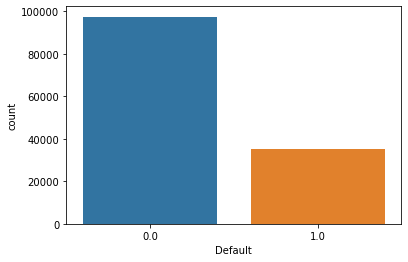

In [76]:
sns.countplot(ntrain.Default)

### Note: 
Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!
*  So we us smote technique for the imbalance data this will make a synthetic sample for miority class

In [77]:
ntrain['Default']=ntrain.Default.astype('int')

<AxesSubplot:xlabel='Age', ylabel='Compensation'>

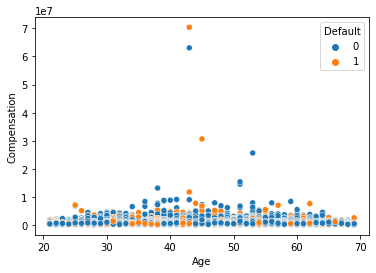

In [47]:
sns.scatterplot(ntrain.Age,ntrain.Compensation,hue=ntrain['Default'])

<AxesSubplot:xlabel='Default', ylabel='Compensation'>

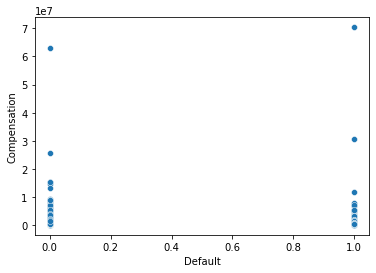

In [48]:
sns.scatterplot(ntrain.Default,ntrain.Compensation)

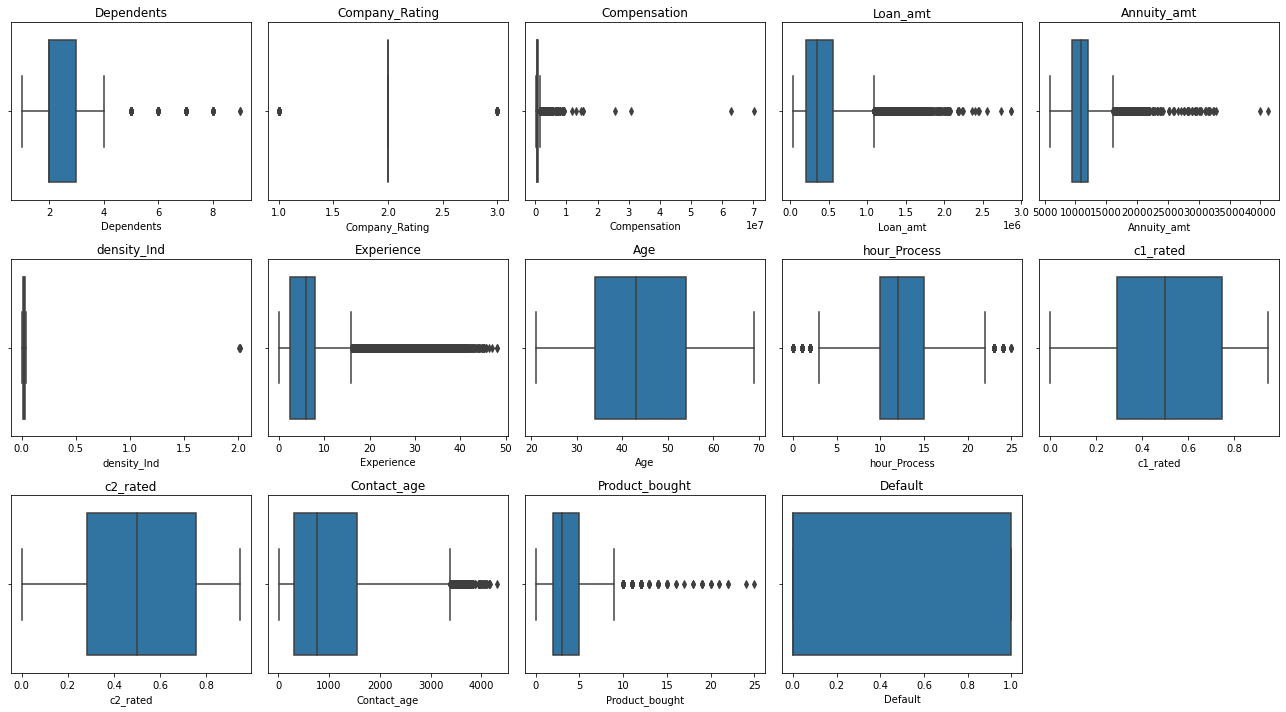

In [49]:
a=3
b=5
c=1
plt.figure(figsize=(18,10))
for i in ntrain.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.boxplot(ntrain.loc[:,i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

In [50]:
q1=ntrain.quantile(0.25)
q3=ntrain.quantile(0.75)
iqr=q3-q1
uper=q3+1.5*iqr
lower=q1-1.5*iqr
ntrain[~((ntrain<lower)|(ntrain>uper)).any(axis=1)]

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No,801850.0,658040.0,13816.52,0.030400,0.900000,46.0,10.0,0.077,0.077,18.0,2.0,1
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes,341874.0,179008.0,7184.13,0.037300,4.700000,39.0,12.0,0.500,0.561,20.0,4.0,0
6,N,IT,df,None,Metro,1,Grad,Married,F,1_to_3,Not_Specified,Tue,No,CLoan,4.0,2.0,South,Yes,Yes,757887.0,977270.0,10708.27,0.008900,4.100000,36.0,12.0,0.142,0.142,721.0,3.0,1
8,N,IT,ndf,One,Metro,1,Grad,Married,F,1_to_3,Y,mon,Yes,CLoan,2.0,2.0,South,Yes,Yes,836238.0,318034.0,12528.06,0.036800,7.600000,52.0,12.0,0.910,0.910,12.0,4.0,0
9,N,Non-IT,ndf,One,Metro,1,Grad,Single,M,4_to_6,Not_Specified,thur,Yes,CLoan,1.0,2.0,East,Yes,Yes,822222.0,265048.0,8849.20,0.013800,1.300000,34.0,12.0,0.757,0.500,888.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132433,N,IT,ndf,One,Metro,3,Grad,Married,M,1_to_3,Y,thur,Yes,CLoan,2.0,2.0,North,Yes,Yes,557308.0,281820.9,8848.72,0.031100,6.580616,53.0,11.0,0.194,0.194,928.0,6.0,0
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes,641706.0,1048272.0,13181.84,0.023800,6.580616,43.0,7.0,0.886,0.886,2766.0,5.0,1
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes,594160.0,640232.0,11911.93,0.026200,6.580616,60.0,9.0,0.500,0.641,2581.0,1.0,0
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes,613585.0,528490.2,13008.76,0.005600,6.580616,59.0,14.0,0.224,0.224,1608.0,2.0,1


### Note
* there is lot of outliers but if remove these Outliers there is huge data loss as we can see above so to overcome this problem we go with outliers

In [51]:
ntest.isnull().sum()

Vehicle_Status        0
Job_Type              0
Default_hist          0
Prop_List             0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Addr_permanent        0
Permanent_Addr_tag    0
Compensation          0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Experience            0
Age                   0
hour_Process          0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [52]:
ntrain.select_dtypes('object')

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,North,Yes,Yes
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,South,Yes,Yes
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,Central,Yes,Yes


In [53]:
ntrain.Income_Alt.value_counts()
# here 73%v of datat is  not specified so we drop this feature

Not_Specified    97530
Y                34910
Name: Income_Alt, dtype: int64

In [54]:
ntrain.drop('Income_Alt',axis=1,inplace=True)
ntest.drop('Income_Alt',axis=1,inplace=True)

In [55]:
ntrain.select_dtypes(np.number)

,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,3.0,2.0,801850.0,658040.0,13816.52,0.030400,0.900000,46.0,10.0,0.077,0.077,18.0,2.0,1
1,3.0,1.0,884222.0,198075.0,11173.06,0.019400,3.000000,46.0,12.0,0.184,0.184,306.0,4.0,0
2,2.0,3.0,284120.0,101056.0,8390.40,0.011800,6.580616,57.0,5.0,0.538,0.538,281.0,4.0,0
3,4.0,2.0,341874.0,179008.0,7184.13,0.037300,4.700000,39.0,12.0,0.500,0.561,20.0,4.0,0
4,3.0,1.0,1259895.0,573715.0,13212.77,0.013800,6.900000,32.0,16.0,0.500,0.200,2339.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,2.0,2.0,641706.0,1048272.0,13181.84,0.023800,6.580616,43.0,7.0,0.886,0.886,2766.0,5.0,1
132436,1.0,2.0,594160.0,640232.0,11911.93,0.026200,6.580616,60.0,9.0,0.500,0.641,2581.0,1.0,0
132437,2.0,2.0,1471170.0,732914.0,11587.54,0.020446,2.500000,51.0,4.0,0.384,0.384,1987.0,3.0,0
132438,1.0,2.0,613585.0,528490.2,13008.76,0.005600,6.580616,59.0,14.0,0.224,0.224,1608.0,2.0,1


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
snu=pd.DataFrame(sc.fit_transform(ntrain.select_dtypes(np.number).drop('Default',axis=1)),columns=ntrain.select_dtypes(np.number).drop('Default',axis=1).columns)
snt=pd.DataFrame(sc.fit_transform(ntest.select_dtypes(np.number)),columns=ntest.select_dtypes(np.number).columns)
snu

,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,0.929036,-0.057893,0.131756,0.885543,1.467046,6.741437e-01,-9.778749e-01,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558
1,0.929036,-2.136900,0.311074,-0.789020,0.161838,-7.085609e-02,-6.163759e-01,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728
2,-0.171022,2.021114,-0.995302,-1.142230,-1.212100,-5.855832e-01,-4.693821e-14,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728
3,2.029094,-0.057893,-0.869576,-0.858436,-1.807696,1.141462e+00,-3.237337e-01,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728
4,0.929036,-2.136900,1.128885,0.578547,1.168945,-4.501287e-01,5.497958e-02,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,-0.171022,-0.057893,-0.216865,2.306233,1.153673,2.271438e-01,-4.693821e-14,-0.078014,-1.418921,1.521725,1.492806,2.234604,0.741871
132436,-1.271081,-0.057893,-0.320369,0.820710,0.526655,3.896892e-01,-4.693821e-14,1.343075,-0.858178,-0.020555,0.531453,2.004865,-1.098701
132437,-0.171022,-0.057893,1.588814,1.158131,0.366488,5.827407e-14,-7.024471e-01,0.590733,-2.260034,-0.484038,-0.476986,1.267217,-0.178415
132438,-1.271081,-0.057893,-0.278082,0.413900,1.068215,-1.005492e+00,-4.693821e-14,1.259481,0.543677,-1.123326,-1.104808,0.796563,-0.638558


In [57]:
ca=pd.get_dummies(ntrain.select_dtypes('object'),drop_first=True)
nu=ntrain.select_dtypes(np.number)
new_train=pd.concat([ca,snu],axis=1)
x=new_train
y=ntrain.Default
x

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0.929036,-0.057893,0.131756,0.885543,1.467046,6.741437e-01,-9.778749e-01,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558
1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0.929036,-2.136900,0.311074,-0.789020,0.161838,-7.085609e-02,-6.163759e-01,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728
2,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,-0.171022,2.021114,-0.995302,-1.142230,-1.212100,-5.855832e-01,-4.693821e-14,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,2.029094,-0.057893,-0.869576,-0.858436,-1.807696,1.141462e+00,-3.237337e-01,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728
4,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0.929036,-2.136900,1.128885,0.578547,1.168945,-4.501287e-01,5.497958e-02,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,-0.171022,-0.057893,-0.216865,2.306233,1.153673,2.271438e-01,-4.693821e-14,-0.078014,-1.418921,1.521725,1.492806,2.234604,0.741871
132436,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,-1.271081,-0.057893,-0.320369,0.820710,0.526655,3.896892e-01,-4.693821e-14,1.343075,-0.858178,-0.020555,0.531453,2.004865,-1.098701
132437,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,-0.171022,-0.057893,1.588814,1.158131,0.366488,5.827407e-14,-7.024471e-01,0.590733,-2.260034,-0.484038,-0.476986,1.267217,-0.178415
132438,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,-1.271081,-0.057893,-0.278082,0.413900,1.068215,-1.005492e+00,-4.693821e-14,1.259481,0.543677,-1.123326,-1.104808,0.796563,-0.638558


In [58]:
xtest=pd.concat([pd.get_dummies(ntest.select_dtypes('object'),drop_first=True),snt],axis=1)
xtest

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0.934162,-0.053829,-0.232708,1.430659,-0.833283,-1.152844,-2.072411e-01,-0.412734,-0.303673,-0.583193,-0.614842,2.713946,-0.643678
1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,-0.165924,2.020383,-0.828340,-1.239008,-1.555643,0.774176,-7.469868e-01,0.171600,0.259050,-1.028270,-1.054741,0.962400,0.735944
2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0.934162,-0.053829,-0.678967,-0.533756,-0.888937,0.676914,7.677833e-01,-0.913592,0.821773,-1.528982,-1.549628,-0.249826,0.276070
3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,-0.165924,-0.053829,0.594784,0.757428,0.990912,0.701229,5.414384e-01,0.338552,-0.022312,-0.686514,-0.716962,-0.437090,0.276070
4,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,-0.165924,2.020383,1.618839,0.416537,0.477572,-0.800266,-1.391779e-15,0.755934,-1.429119,1.765385,1.706411,0.328197,-1.103552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,-1.266010,-0.053829,-0.182289,-0.559739,-0.581845,-0.940082,-5.206419e-01,-0.162305,-0.303673,0.875230,0.826613,-0.928971,1.655693
56756,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,-0.165924,2.020383,-0.239307,1.086680,1.596304,0.707308,1.481641e+00,0.255076,-0.866396,-0.257333,-1.227559,-1.169918,-1.563426
56757,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0.934162,-0.053829,-0.509452,-0.663604,0.230916,0.786334,-1.095210e+00,-0.746639,-0.585035,-1.274652,-1.298257,-0.228602,0.735944
56758,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,-1.266010,-2.128041,0.643269,2.471378,-0.300860,-0.927924,-9.036872e-01,-1.831831,0.259050,0.688457,0.642012,-0.107505,-0.183804


In [59]:
print(x.shape)
print(xtest.shape)

(132440, 45)
(56760, 45)


In [60]:
# Without dealing with imbalance data may lead to baisness to non defaulters this cost so muchto this company

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
lr=LogisticRegression()
model=lr.fit(x,y)
pred=model.predict(xtest)

In [62]:
solution=pd.DataFrame({'ID':test.ID,'Default':pred})
solution.Default.value_counts()

0    56760
Name: Default, dtype: int64

In [63]:
rf=RandomForestClassifier()
model=rf.fit(x,y)
rfprd=model.predict(xtest)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

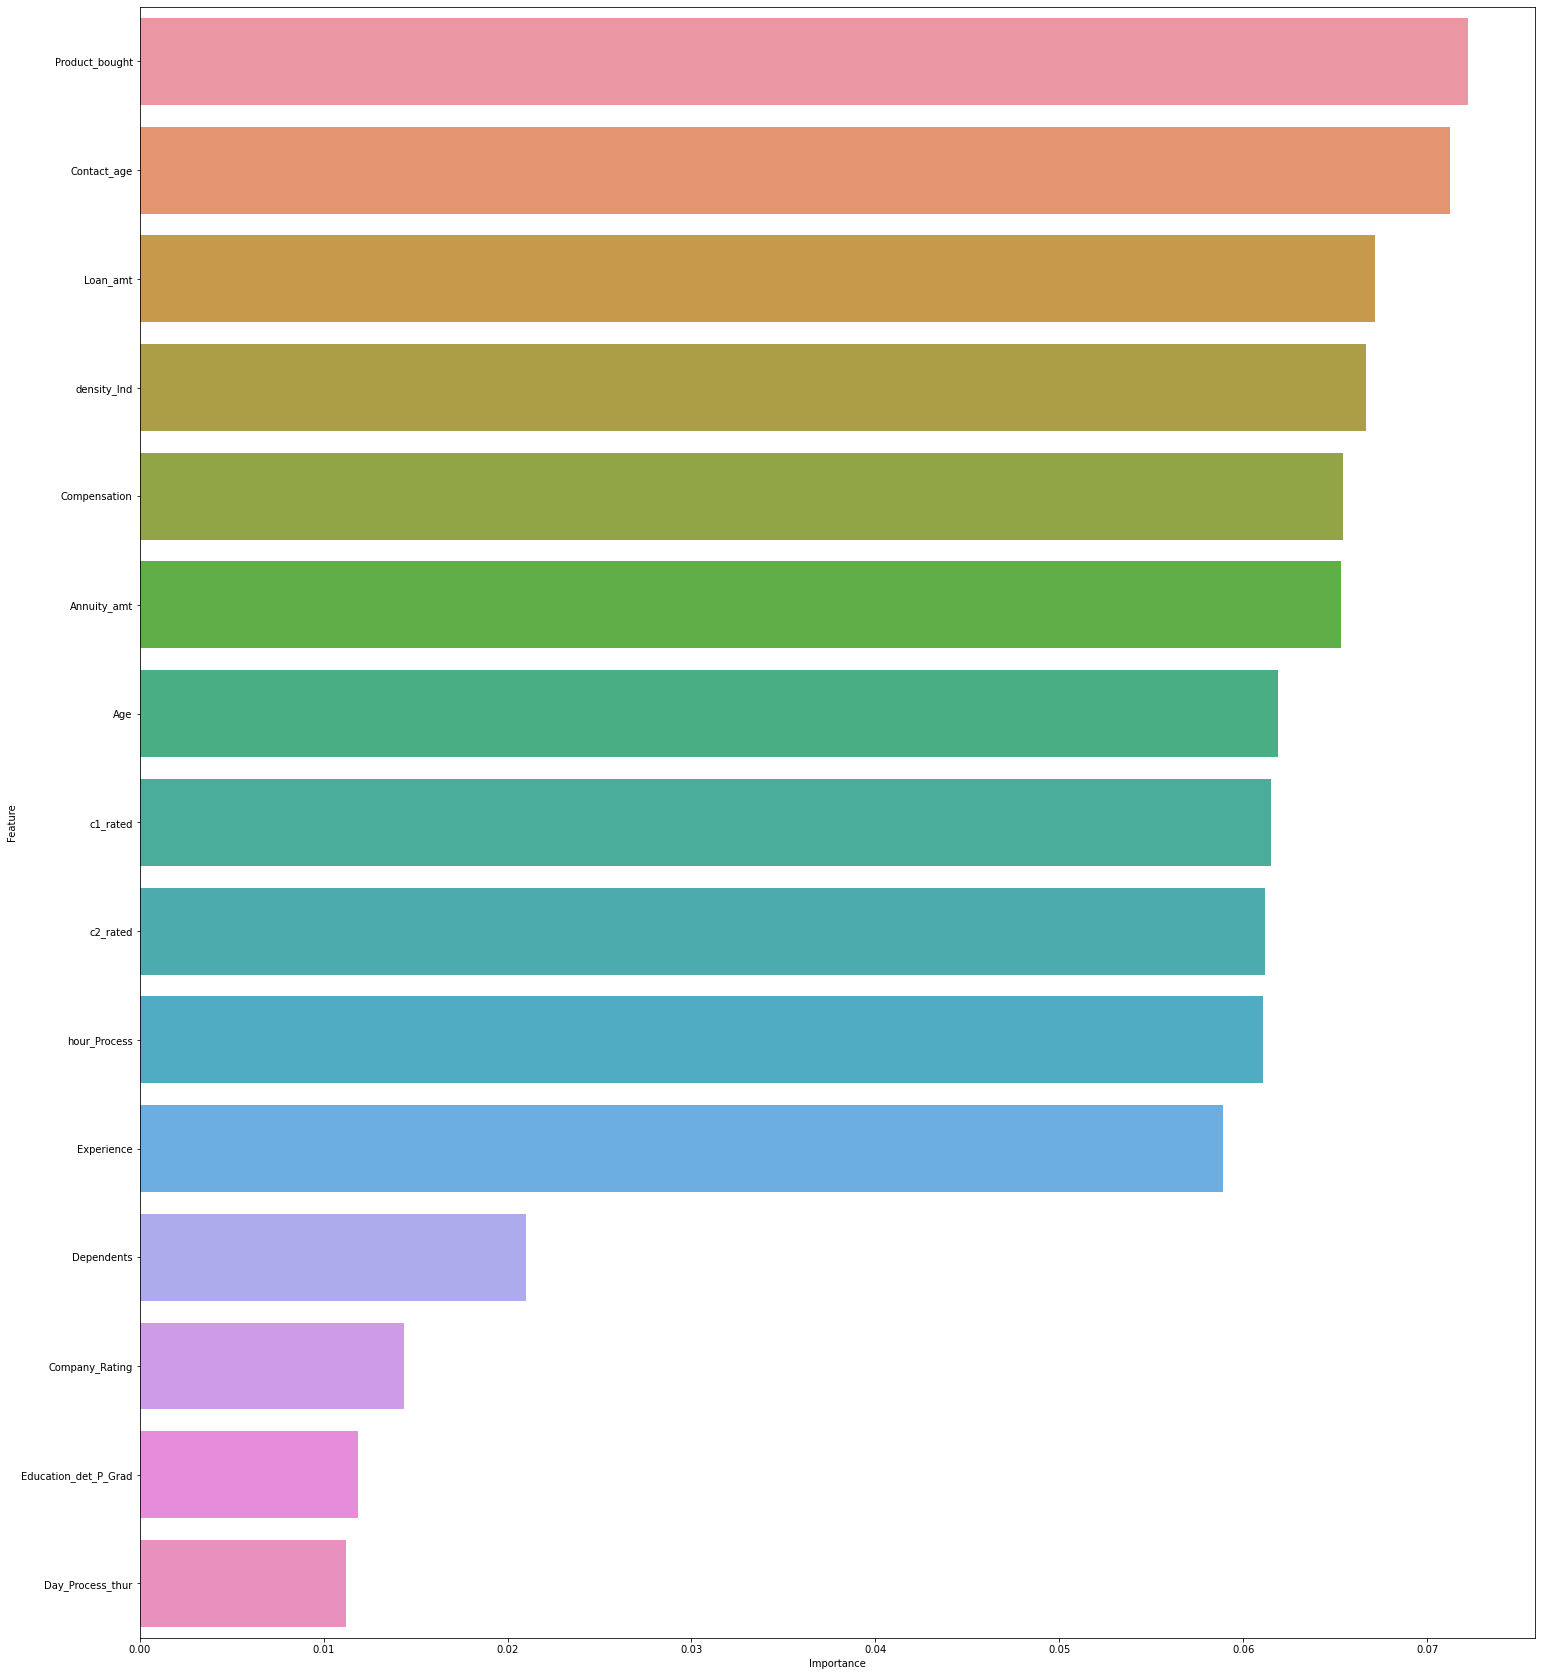

In [90]:
imp_feature=pd.DataFrame({'Feature':x.columns,'Importance':model.feature_importances_})
newimp=imp_feature.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(25,30))
sns.barplot(y='Feature',x='Importance',data=newimp[:15])

In [86]:
train.select_dtypes(np.number)

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,NaN,0.9,46.0,10.0,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,46.0,12.0,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,NaN,57.0,5.0,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,39.0,12.0,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,32.0,16.0,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,435665,641706.0,1048272.0,13181.84,0.0238,4.0,NaN,43.0,7.0,0.886,0.886,2766.0,5.0,1.0
132436,509840,594160.0,640232.0,11911.93,0.0262,4.0,NaN,60.0,9.0,NaN,0.641,2581.0,1.0,0.0
132437,504105,1471170.0,732914.0,11587.54,NaN,4.0,2.5,51.0,4.0,0.384,0.384,1987.0,3.0,0.0
132438,430757,613585.0,528490.2,13008.76,0.0056,4.0,NaN,59.0,14.0,0.224,0.224,1608.0,2.0,1.0


In [65]:
rfsolution=pd.DataFrame({'ID':test.ID,'Default':rfprd})
rfsolution.to_csv("tvshackathon.csv",index=False)
#solution.to_csv("Flightlgbm.csv", index = False)

In [66]:
rfsolution.Default.value_counts()

0    56701
1       59
Name: Default, dtype: int64

In [67]:
x

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0.929036,-0.057893,0.131756,0.885543,1.467046,6.741437e-01,-9.778749e-01,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558
1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0.929036,-2.136900,0.311074,-0.789020,0.161838,-7.085609e-02,-6.163759e-01,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728
2,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,-0.171022,2.021114,-0.995302,-1.142230,-1.212100,-5.855832e-01,-4.693821e-14,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,2.029094,-0.057893,-0.869576,-0.858436,-1.807696,1.141462e+00,-3.237337e-01,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728
4,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0.929036,-2.136900,1.128885,0.578547,1.168945,-4.501287e-01,5.497958e-02,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,-0.171022,-0.057893,-0.216865,2.306233,1.153673,2.271438e-01,-4.693821e-14,-0.078014,-1.418921,1.521725,1.492806,2.234604,0.741871
132436,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,-1.271081,-0.057893,-0.320369,0.820710,0.526655,3.896892e-01,-4.693821e-14,1.343075,-0.858178,-0.020555,0.531453,2.004865,-1.098701
132437,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,-0.171022,-0.057893,1.588814,1.158131,0.366488,5.827407e-14,-7.024471e-01,0.590733,-2.260034,-0.484038,-0.476986,1.267217,-0.178415
132438,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,-1.271081,-0.057893,-0.278082,0.413900,1.068215,-1.005492e+00,-4.693821e-14,1.259481,0.543677,-1.123326,-1.104808,0.796563,-0.638558


In [68]:
import lightgbm as lgm
lg=lgm.LGBMClassifier()
lgmodel=lg.fit(x,y)
lgpred=lgmodel.predict(xtest)
solution=pd.DataFrame({'ID':test.ID,'Default':lgpred})
solution.to_csv('lgbmodel.csv',index=False)
solution.Default.value_counts()

0    56755
1        5
Name: Default, dtype: int64

In [69]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, y_train_res = sm.fit_resample(x, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 35004
Before OverSampling, counts of label '0': 97436 

After OverSampling, the shape of train_X: (194872, 45)
After OverSampling, the shape of train_y: (194872,) 

After OverSampling, counts of label '1': 97436
After OverSampling, counts of label '0': 97436


In [71]:
X_train_res

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0.929036,-0.057893,0.131756,0.885543,1.467046,0.674144,-9.778749e-01,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558
1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0.929036,-2.136900,0.311074,-0.789020,0.161838,-0.070856,-6.163759e-01,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728
2,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,-0.171022,2.021114,-0.995302,-1.142230,-1.212100,-0.585583,-4.693821e-14,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,2.029094,-0.057893,-0.869576,-0.858436,-1.807696,1.141462,-3.237337e-01,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728
4,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0.929036,-2.136900,1.128885,0.578547,1.168945,-0.450129,5.497958e-02,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194867,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,-0.171022,-1.116922,0.931897,1.450822,1.872856,0.601934,-6.299947e-01,-0.671020,-1.143816,0.573400,1.229086,-0.093965,1.436407
194868,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2.029094,-0.057893,-0.694705,0.001631,-0.211372,-1.185138,-6.874915e-01,-0.678524,-0.275364,-0.020555,-0.928921,-0.716435,-0.614408
194869,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.929036,-0.057893,-0.133875,1.600432,0.702425,-0.716801,-4.210387e-01,-0.074384,0.543677,-1.484941,-1.459938,1.388503,1.202014
194870,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.271081,-0.057893,0.513893,-0.012804,-1.020862,-1.265897,-8.944816e-01,-1.169052,2.221072,-1.011108,-0.994603,0.980867,1.662157


In [72]:
rf=RandomForestClassifier()
model=rf.fit(X_train_res,y_train_res)
rfprd=model.predict(xtest)

In [73]:
sol=pd.DataFrame({'ID':test.ID,'Default':rfprd})
#sol.Default.value_counts()
sol.to_csv('tvsrfmodel.csv',index=False)

In [74]:
sol.Default.value_counts()

0    40996
1    15764
Name: Default, dtype: int64

In [75]:
import lightgbm as lgm
lg=lgm.LGBMClassifier()
lgmodel=lg.fit(X_train_res,y_train_res)
lgpred=lgmodel.predict(xtest)
solution=pd.DataFrame({'ID':test.ID,'Default':lgpred})
solution.to_csv('tvslgbmodel.csv',index=False)

In [76]:
solution.Default.value_counts()

1    54962
0     1798
Name: Default, dtype: int64

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbmpre=gbm.fit(X_train_res,y_train_res).predict(xtest)
solgbm=pd.DataFrame({'ID':test.ID,'Default':lgpred})
#solgbm.to_csv('tvslgbmodel.csv',index=False)
solgbm.Default.value_counts()

1    54962
0     1798
Name: Default, dtype: int64

In [78]:
import xgboost as xgb
mo=xgb.XGBClassifier()
xbgpred=mo.fit(X_train_res,y_train_res).predict(xtest)
xgbsol=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
xgbsol.Default.value_counts()

1    56730
0       30
Name: Default, dtype: int64

In [83]:
params={'n_estimators':[50,100,150,200],'learning_rate':[0.01,0.05,0.1,0.15]}

from sklearn.model_selection import GridSearchCV,KFold
kv=KFold(n_splits=5,shuffle=True,random_state=10)
gsv=GridSearchCV(mo,param_grid=params,cv=kv)
gsvmodel=gsv.fit(X_train_res,y_train_res)
print('best parameter;',gsvmodel.best_params_)

best parameter; {'learning_rate': 0.15, 'n_estimators': 200}


In [84]:
mo=xgb.XGBClassifier(n_estimators=200,learning_rate=0.15)
xbgpred=mo.fit(X_train_res,y_train_res).predict(xtest)
xgbsol=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
xgbsol.Default.value_counts()

1    56724
0       36
Name: Default, dtype: int64

In [85]:
xgbsol.to_csv('xgbtvsgcv.csv',index=False)

In [80]:
pip install 

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [120]:
# To deal with imbalance data more efficeiently there is another method smoteTomek's
from collections import Counter
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=1)
X_train_tl, y_train_tl = smt.fit_resample(x, y)
  
print('After OverSampling, the shape of train_X: {}'.format(Counter(y)))
print('After OverSampling, the shape of train_y: {} \n'.format(Counter(y_train_tl)))
  


After OverSampling, the shape of train_X: Counter({0: 97436, 1: 35004})
After OverSampling, the shape of train_y: Counter({1: 96706, 0: 96706}) 



In [82]:
rf=RandomForestClassifier()
model=rf.fit(X_train_tl,y_train_tl)
rfsprd=model.predict(xtest)
solst=pd.DataFrame({'ID':test.ID,'Default':rfsprd})
#sol.Default.value_counts()
solst.to_csv('rfstvsmodel.csv',index=False)
solst.Default.value_counts()

0    47311
1     9449
Name: Default, dtype: int64

In [125]:
mo=xgb.XGBClassifier(n_estimators=300,learning_rate=0.15)
xbgpred=mo.fit(X_train_tl,y_train_tl).predict(xtest)
xgbsol=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
xgbsol.to_csv('tvsxgb.csv',index=False)
xgbsol.Default.value_counts()


1    56731
0       29
Name: Default, dtype: int64

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbmpre=gbm.fit(X_train_tl,y_train_tl).predict(xtest)
solgbm=pd.DataFrame({'ID':test.ID,'Default':lgpred})
#solgbm.to_csv('tvslgbmodel.csv',index=False)
solgbm.Default.value_counts()

1    54962
0     1798
Name: Default, dtype: int64

In [98]:
import lightgbm as lgm
lg=lgm.LGBMClassifier()
lgmodel=lg.fit(X_train_tl,y_train_tl)
lgpred=lgmodel.predict(xtest)
solution=pd.DataFrame({'ID':test.ID,'Default':lgpred})
solution.to_csv('tvslgbmodel.csv',index=False)

In [99]:
solution.Default.value_counts()

1    53957
0     2803
Name: Default, dtype: int64

In [94]:
# So from the feature importance we get some features who are contributing more than others so we take them as a new features
newdata=ntrain.select_dtypes(np.number).drop('Default',axis=1)
sc=StandardScaler()
scalenew=pd.DataFrame(sc.fit_transform(newdata),columns=newdata.columns)
y=ntrain.Default
print(scalenew.shape,y.shape)

(132440, 13) (132440,)


In [102]:
from collections import Counter
sm = SMOTE(random_state = 10)
X_train_new, y_train_new = sm.fit_resample(scalenew, y)
  
print('After OverSampling, the shape of train_X: {}'.format(Counter(y)))
print('After OverSampling, the shape of train_y: {} \n'.format(Counter(y_train_new)))

After OverSampling, the shape of train_X: Counter({0: 97436, 1: 35004})
After OverSampling, the shape of train_y: Counter({1: 97436, 0: 97436}) 



In [99]:
newtest=ntest.select_dtypes(np.number)
sc=StandardScaler()
scaletest=pd.DataFrame(sc.fit_transform(newtest),columns=newtest.columns)
scaletest

,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,0.934162,-0.053829,-0.232708,1.430659,-0.833283,-1.152844,-2.072411e-01,-0.412734,-0.303673,-0.583193,-0.614842,2.713946,-0.643678
1,-0.165924,2.020383,-0.828340,-1.239008,-1.555643,0.774176,-7.469868e-01,0.171600,0.259050,-1.028270,-1.054741,0.962400,0.735944
2,0.934162,-0.053829,-0.678967,-0.533756,-0.888937,0.676914,7.677833e-01,-0.913592,0.821773,-1.528982,-1.549628,-0.249826,0.276070
3,-0.165924,-0.053829,0.594784,0.757428,0.990912,0.701229,5.414384e-01,0.338552,-0.022312,-0.686514,-0.716962,-0.437090,0.276070
4,-0.165924,2.020383,1.618839,0.416537,0.477572,-0.800266,-1.391779e-15,0.755934,-1.429119,1.765385,1.706411,0.328197,-1.103552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,-1.266010,-0.053829,-0.182289,-0.559739,-0.581845,-0.940082,-5.206419e-01,-0.162305,-0.303673,0.875230,0.826613,-0.928971,1.655693
56756,-0.165924,2.020383,-0.239307,1.086680,1.596304,0.707308,1.481641e+00,0.255076,-0.866396,-0.257333,-1.227559,-1.169918,-1.563426
56757,0.934162,-0.053829,-0.509452,-0.663604,0.230916,0.786334,-1.095210e+00,-0.746639,-0.585035,-1.274652,-1.298257,-0.228602,0.735944
56758,-1.266010,-2.128041,0.643269,2.471378,-0.300860,-0.927924,-9.036872e-01,-1.831831,0.259050,0.688457,0.642012,-0.107505,-0.183804


In [103]:
X_train_new

,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,0.929036,-0.057893,0.131756,0.885543,1.467046,0.674144,-9.778749e-01,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558
1,0.929036,-2.136900,0.311074,-0.789020,0.161838,-0.070856,-6.163759e-01,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728
2,-0.171022,2.021114,-0.995302,-1.142230,-1.212100,-0.585583,-4.693821e-14,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728
3,2.029094,-0.057893,-0.869576,-0.858436,-1.807696,1.141462,-3.237337e-01,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728
4,0.929036,-2.136900,1.128885,0.578547,1.168945,-0.450129,5.497958e-02,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194867,-0.171022,-2.136900,0.860944,0.545094,1.473510,0.057002,-8.242401e-01,-1.204171,-1.281368,0.316607,0.976899,-0.793387,1.210657
194868,2.029094,-0.057893,-0.938524,-0.919644,-0.261167,-1.336823,-6.204414e-01,-1.329723,0.270664,-0.903743,-0.925100,-1.159018,0.729796
194869,0.929036,-0.057893,-0.472486,1.240685,1.226990,-0.453905,-1.061400e+00,-0.750393,0.543677,-1.058431,-1.041077,2.744241,1.574125
194870,-0.189980,-0.057893,0.015520,-1.071514,-0.314832,-0.247527,-9.113992e-01,-1.169052,2.221072,-1.179955,-1.160422,0.946695,1.662157


In [104]:
rf=RandomForestClassifier()
model=rf.fit(X_train_new,y_train_new)
rfsprd=model.predict(scaletest)
solstnew=pd.DataFrame({'ID':test.ID,'Default':rfsprd})
#sol.Default.value_counts()
#solst.to_csv('rfstvsmodel.csv',index=False)
solstnew.Default.value_counts()

1    48855
0     7905
Name: Default, dtype: int64

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(n_estimators=200,learning_rate=0.15)
gbmpre=gbm.fit(X_train_new,y_train_new).predict(scaletest)
solgbm=pd.DataFrame({'ID':test.ID,'Default':lgpred})
#solgbm.to_csv('tvslgbmodel.csv',index=False)
solgbm.Default.value_counts()

1    54962
0     1798
Name: Default, dtype: int64

In [107]:
mo=xgb.XGBClassifier(n_estimators=200,learning_rate=0.15)
xbgpred=mo.fit(X_train_new,y_train_new).predict(scaletest)
xgbsonew=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
#xgbsol.to_csv('tvsxgb.csv',index=False)
xgbsonew.Default.value_counts()

1    56751
0        9
Name: Default, dtype: int64

In [116]:
mo=xgb.XGBClassifier(n_estimators=100,learning_rate=0.15)
xbgpred=mo.fit(X_train_new,y_train_new).predict(scaletest)
xgbsonew=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
xgbsonew.Default.value_counts()

1    56737
0       23
Name: Default, dtype: int64

In [168]:
lg=lgm.LGBMClassifier()
lgmodel=lg.fit(X_train_new,y_train_new)
lgpred=lgmodel.predict(scaletest)
solution=pd.DataFrame({'ID':test.ID,'Default':lgpred})
solution.to_csv('tvslgbmodel.csv',index=False)

In [145]:
numscale=pd.DataFrame(sc.fit_transform(outtrain.select_dtypes(np.number)),columns=outtrain.select_dtypes(np.number).columns).drop('Default',axis=1)
numscale.reset_index(drop=True,inplace=True)
numscale

,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1.053868,0.0,0.586949,1.257693,1.736772,0.885241,-1.266120,0.186268,-0.634378,-1.710714,-1.680798,-1.167752,-0.647303
1,2.236970,0.0,-1.457216,-0.865577,-1.868819,1.494789,-0.191841,-0.382891,-0.044579,-0.019844,0.217416,-1.165221,0.328677
2,2.236970,0.0,0.391574,2.672654,0.047023,-1.014075,-0.361464,-0.626817,-0.044579,-1.450887,-1.425872,-0.278277,-0.159313
3,-0.129235,0.0,0.739771,-0.249356,1.036322,1.450619,0.628004,0.674120,-0.044579,1.619061,1.586169,-1.175343,0.328677
4,-1.312338,0.0,0.677483,-0.484212,-0.963630,-0.581208,-1.153038,-0.789434,-0.044579,1.007470,-0.021822,-0.066979,1.304657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86607,-0.129235,0.0,-0.499813,-0.409867,-0.963891,0.947079,0.339819,0.755428,-0.339479,-1.243026,-1.221932,-0.016369,1.304657
86608,-0.129235,0.0,-0.124742,2.987365,1.391739,0.302195,0.339819,-0.057657,-1.519076,1.523125,1.492043,2.309170,0.816667
86609,-1.312338,0.0,-0.336040,1.178761,0.701373,0.514212,0.339819,1.324588,-0.929278,-0.019844,0.531170,2.075098,-1.135293
86610,-1.312338,0.0,-0.249714,0.683474,1.297647,-1.305598,0.339819,1.243279,0.545219,-1.123106,-1.104274,0.844005,-0.647303


In [146]:
catout=pd.get_dummies(outtrain.select_dtypes('object'),drop_first=True)
catout.reset_index(drop=True,inplace=True)
catout

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1
4,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86607,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1
86608,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1
86609,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
86610,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1


In [149]:
# After removing Outlers 
q1=ntrain.quantile(0.25)
q3=ntrain.quantile(0.75)
iqr=q3-q1
uper=q3+1.5*iqr
lower=q1-1.5*iqr
outtrain=ntrain[~((ntrain<lower)|(ntrain>uper)).any(axis=1)]
outtraindata=pd.concat([catout,numscale],axis=1)

In [154]:
outtraindata

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Dependents,Company_Rating,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1.053868,0.0,0.586949,1.257693,1.736772,0.885241,-1.266120,0.186268,-0.634378,-1.710714,-1.680798,-1.167752,-0.647303
1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,2.236970,0.0,-1.457216,-0.865577,-1.868819,1.494789,-0.191841,-0.382891,-0.044579,-0.019844,0.217416,-1.165221,0.328677
2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,2.236970,0.0,0.391574,2.672654,0.047023,-1.014075,-0.361464,-0.626817,-0.044579,-1.450887,-1.425872,-0.278277,-0.159313
3,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,-0.129235,0.0,0.739771,-0.249356,1.036322,1.450619,0.628004,0.674120,-0.044579,1.619061,1.586169,-1.175343,0.328677
4,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,-1.312338,0.0,0.677483,-0.484212,-0.963630,-0.581208,-1.153038,-0.789434,-0.044579,1.007470,-0.021822,-0.066979,1.304657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86607,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,-0.129235,0.0,-0.499813,-0.409867,-0.963891,0.947079,0.339819,0.755428,-0.339479,-1.243026,-1.221932,-0.016369,1.304657
86608,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,-0.129235,0.0,-0.124742,2.987365,1.391739,0.302195,0.339819,-0.057657,-1.519076,1.523125,1.492043,2.309170,0.816667
86609,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,-1.312338,0.0,-0.336040,1.178761,0.701373,0.514212,0.339819,1.324588,-0.929278,-0.019844,0.531170,2.075098,-1.135293
86610,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,-1.312338,0.0,-0.249714,0.683474,1.297647,-1.305598,0.339819,1.243279,0.545219,-1.123106,-1.104274,0.844005,-0.647303


In [158]:
yout=outtrain.Default
yout

0         1
3         0
6         1
8         0
9         1
         ..
132433    0
132435    1
132436    0
132438    1
132439    1
Name: Default, Length: 86612, dtype: int32

In [160]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_out,y_out=sm.fit_resample(outtraindata,yout)
print('no of label before smote {}'.format(Counter(yout)))
print('no of labels after smote {}'.format(Counter(y_out)))

no of label before smote Counter({0: 63601, 1: 23011})
no of labels after smote Counter({1: 63601, 0: 63601})


In [165]:
mo=xgb.XGBClassifier(n_estimators=100,learning_rate=0.05)
xbgpred=mo.fit(x_out,y_out).predict(xtest)
xgbsonew=pd.DataFrame({'ID':test.ID,'Default':xbgpred})
xgbsol.to_csv('tvsxgb.csv',index=False)
xgbsonew.Default.value_counts()

1    56598
0      162
Name: Default, dtype: int64

In [166]:
lg=lgm.LGBMClassifier()
lgmodel=lg.fit(x_out,y_out)
lgpred=lgmodel.predict(xtest)
solution=pd.DataFrame({'ID':test.ID,'Default':lgpred})
solution.to_csv('tvslgbmodel.csv',index=False)
solution.Default.value_counts()

1    56750
0       10
Name: Default, dtype: int64

In [82]:
ntrain

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag,Compensation,Loan_amt,Annuity_amt,density_Ind,Experience,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,Yes,No,801850.0,658040.0,13816.52,0.030400,0.900000,46.0,10.0,0.077,0.077,18.0,2.0,1
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,Yes,Yes,884222.0,198075.0,11173.06,0.019400,3.000000,46.0,12.0,0.184,0.184,306.0,4.0,0
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,Yes,Yes,284120.0,101056.0,8390.40,0.011800,6.580616,57.0,5.0,0.538,0.538,281.0,4.0,0
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,Yes,Yes,341874.0,179008.0,7184.13,0.037300,4.700000,39.0,12.0,0.500,0.561,20.0,4.0,0
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,Yes,Yes,1259895.0,573715.0,13212.77,0.013800,6.900000,32.0,16.0,0.500,0.200,2339.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,Y,IT,ndf,One,Rural,3,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,North,Yes,Yes,641706.0,1048272.0,13181.84,0.023800,6.580616,43.0,7.0,0.886,0.886,2766.0,5.0,1
132436,N,IT,ndf,One,Metro,3,Grad,Single,M,1_to_3,Not_Specified,Tue,Yes,CLoan,1.0,2.0,North,Yes,Yes,594160.0,640232.0,11911.93,0.026200,6.580616,60.0,9.0,0.500,0.641,2581.0,1.0,0
132437,N,Non-IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,2.0,South,Yes,Yes,1471170.0,732914.0,11587.54,0.020446,2.500000,51.0,4.0,0.384,0.384,1987.0,3.0,0
132438,N,Non-IT,ndf,One,Metro,1,Grad,Widow,M,1_to_3,Y,mon,Yes,CLoan,1.0,2.0,Central,Yes,Yes,613585.0,528490.2,13008.76,0.005600,6.580616,59.0,14.0,0.224,0.224,1608.0,2.0,1


In [83]:
ntrain.Type_Loan.value_counts()

CLoan    119928
RLoan     12512
Name: Type_Loan, dtype: int64

### Question) 
Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.
### Answer
As we can see most of the important features are that are contributing to better eprediction of defaulter are  Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List	Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Dependents,Company_Rating,Region,Age,Addr_permanent,Permanent_Addr_tag,
* Product_bought on the basis of this features we can get predict whether the customer will default or not like product brought could be highest priority suppose a customer purhased prior few  products & they paid the loan amount timely
* Compensation also affect the defaulters because sometimes some of the customers have high compensation but they might have bad cbil score this could be helpfull to know  whether the customer default or not but most chances is that those have  high customers will tends to be non defaulters on the basis of their cbil score
* As we can gender also play a role to defaulters as we can above the ratio of defaultersof women is higher than the man  to the company 
* Education also matters like most of the defaulters are from Graduates background 
* Most of the additional Income is not Specified i drop this feature there is no variability
* Most of the defaulters are from IT background there is posiblity that most of them are from graduates
* Annuity amount is one of the major factor that cause person to be a defaulters because somtimes annuity amount is so high that a person is not laible topay the amont even he have high compensation 
* By the menas of Default History we can get to knoe about the customer behavior whether a person will pay or not
* Address can also cause a person to be defaulter if a person file a address in application is different but their actual or not most of the time person are tenants their chances of being a defauter is high & approve only if  the address is Verified


